In [66]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [1]:
import torch;
torch.__version__

'2.4.0'

In [4]:
import shutil

# Copy the dataset to a writable location
shutil.copytree('/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset', '/kaggle/working/COVID-19_Radiography')

'/kaggle/working/COVID-19_Radiography'

In [5]:
from pathlib import Path
import os
import shutil

# Define the base directory
base_dir = Path('/kaggle/working/COVID-19_Radiography')

# Iterate over all subdirectories in the base directory
for subdir in base_dir.iterdir():
    if subdir.is_dir():
        # Define the path to the 'masks' directory in the current subdirectory
        masks_dir = subdir / 'masks'

        # Check if the 'masks' directory exists
        if masks_dir.exists():
            try:
                # Recursively remove the 'masks' directory and its contents
                shutil.rmtree(masks_dir)
                print(f"Successfully removed the directory: {masks_dir}")
            except OSError as e:
                print(f"Error: {e.strerror}. Unable to remove {masks_dir}")
        else:
            print(f"The directory {masks_dir} does not exist.")

Successfully removed the directory: /kaggle/working/COVID-19_Radiography/COVID/masks
Successfully removed the directory: /kaggle/working/COVID-19_Radiography/Lung_Opacity/masks
Successfully removed the directory: /kaggle/working/COVID-19_Radiography/Normal/masks
Successfully removed the directory: /kaggle/working/COVID-19_Radiography/Viral Pneumonia/masks


In [6]:
import os 
  
main_directory = "Xray_MRI_Dataset"
parent_dir = "/kaggle/working/"
  
# Create the main directory
path = os.path.join(parent_dir, main_directory) 
os.mkdir(path) 

print(f"Created Main directory: {main_directory}")

# Subdirectories to create inside the main directory
directory_1 = "train"
directory_2 = "test"

# Create the 'train' and 'test' directories inside the main directory
train_path = os.path.join(path, directory_1) 
test_path = os.path.join(path, directory_2)

# Creating subdirectories
os.mkdir(train_path)
os.mkdir(test_path)

print(f"Created 'train' and 'test' directories inside {main_directory}")


Created Main directory: Xray_MRI_Dataset
Created 'train' and 'test' directories inside Xray_MRI_Dataset


In [7]:
import os
import shutil

# Paths to the main image folder and the destination folder
source_dir = '/kaggle/working/COVID-19_Radiography'
source1_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'
destination_dir = '/kaggle/working/Xray_MRI_Dataset/train'

# Create a dictionary to define image categories and their corresponding destination paths
categories = {
    'COVID': os.path.join(destination_dir, 'COVID/'),
    'Normal': os.path.join(destination_dir, 'Normal/'),
    'Viral_Pneumonia': os.path.join(destination_dir, 'Viral_Pneumonia/'),
    'Lung_Opacity': os.path.join(destination_dir, 'Lung_Opacity/'),
    'No_Tumor': os.path.join(destination_dir, 'No_Tumor/'),
    'Tumor': os.path.join(destination_dir, 'Tumor/')
}

# Create directories if they don't exist
for category, path in categories.items():
    if not os.path.exists(path):
        os.makedirs(path)

# Recursive function to copy images from subdirectories for source_dir
for root, dirs, files in os.walk(source_dir):
    for filename in files:
        if filename.endswith('.png') or filename.endswith('.jpg'):  # Filter for images
            file_path = os.path.join(root, filename)

            # Define logic for categorizing images from source_dir
            if 'COVID' in filename:
                shutil.copy(file_path, os.path.join(categories['COVID'], filename))
            elif 'Normal' in filename:
                shutil.copy(file_path, os.path.join(categories['Normal'], filename))
            elif 'Viral Pneumonia' in filename:
                shutil.copy(file_path, os.path.join(categories['Viral_Pneumonia'], filename))
            elif 'Lung_Opacity' in filename:
                shutil.copy(file_path, os.path.join(categories['Lung_Opacity'], filename))
            else:
                print(f"File {filename} doesn't match any category, skipping...")

# Recursive function to copy images from subdirectories for source1_dir
for root, dirs, files in os.walk(source1_dir):
    for filename in files:
        if filename.endswith('.png') or filename.endswith('.jpg'):  # Filter for images
            file_path = os.path.join(root, filename)

            # Define logic for categorizing images from source1_dir
            if 'Y' in filename:
                shutil.copy(file_path, os.path.join(categories['Tumor'], filename))
            elif 'N' or 'No' or 'no' or 'n' in filename:
                shutil.copy(file_path, os.path.join(categories['No_Tumor'], filename))
            else:
                print(f"File {filename} doesn't match any category, skipping...")

print("Images copied successfully!")






Images copied successfully!


Random image path: /kaggle/working/Xray_MRI_Dataset/train/Normal/Normal-6364.png
Image class: Normal
Image height: 299
Image width: 299


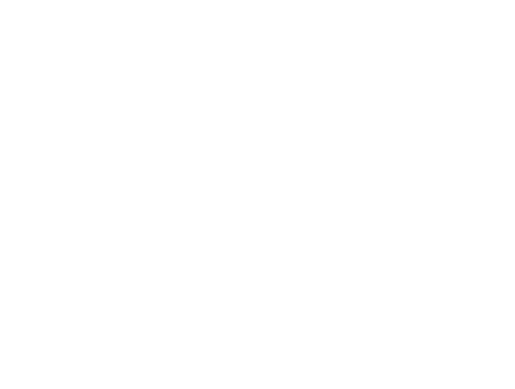

In [8]:
import random
from PIL import Image
from pathlib import Path

# Use the path you provided
img_path = '/kaggle/working/Xray_MRI_Dataset/train/Normal'

# Set seed
random.seed(42)

# Convert image_path to a Path object
image_path = Path(img_path)

# 1. Get all image paths (checking for multiple formats)
image_path_list = list(image_path.glob("*.jpeg")) + \
                  list(image_path.glob("*.jpg")) + \
                  list(image_path.glob("*.png"))

if not image_path_list:
    print("No image files found. Please check the directory structure and file formats.")
    
    # Let's print the contents of the directory to see what's there
    print("\nContents of the directory:")
    for item in image_path.iterdir():
        print(item)
else:
    # 2. Get random image path
    random_image_path = random.choice(image_path_list)

    # 3. Get image class from path name (in this case, it will always be 'NORMAL')
    image_class = random_image_path.parent.name

    # 4. Open image
    img = Image.open(random_image_path)

    # 5. Print metadata
    print(f"Random image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image height: {img.height}") 
    print(f"Image width: {img.width}")

    # Display the image (this might not work in Kaggle notebooks)
    # img.show()

    # Instead, let's use matplotlib to display the image
    import matplotlib.pyplot as plt
#     plt.imshow(img, cmap='gray')  # 'gray' colormap for X-ray images
    plt.axis('off')
#     plt.show()

In [9]:
import os
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

# Define the base directory and the destination directories
base_dir = Path('/kaggle/working/Xray_MRI_Dataset')
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'

# Ensure the test directory exists
test_dir.mkdir(exist_ok=True)

# Iterate over all subdirectories in the train directory
for subdir in train_dir.iterdir():
    if subdir.is_dir():
        # Define the path to the current subdirectory in train and test
        current_train_dir = subdir
        current_test_dir = test_dir / subdir.name

        # Create the corresponding directory in test
        current_test_dir.mkdir(exist_ok=True)

        # List all files in the current train subdirectory
        files = list(current_train_dir.iterdir())

        # Split the files into train and test sets
        train_files, test_files = train_test_split(files, test_size=0.2, random_state=43)

        # Move the test files to the test directory
        for file in test_files:
            shutil.move(file, current_test_dir / file.name)

        print(f"Processed {subdir.name}: {len(train_files)} train, {len(test_files)} test")

print("Dataset split into train and test sets successfully.")

Processed No_Tumor: 68 train, 18 test
Processed COVID: 2892 train, 724 test
Processed Lung_Opacity: 4809 train, 1203 test
Processed Normal: 8153 train, 2039 test
Processed Viral_Pneumonia: 1076 train, 269 test
Processed Tumor: 69 train, 18 test
Dataset split into train and test sets successfully.


       No_Tumor  COVID  Lung_Opacity  Normal  Viral_Pneumonia  Tumor
train        68   2892          4809    8153             1076     69
      No_Tumor  COVID  Lung_Opacity  Normal  Viral_Pneumonia  Tumor
test        18    724          1203    2039              269     18


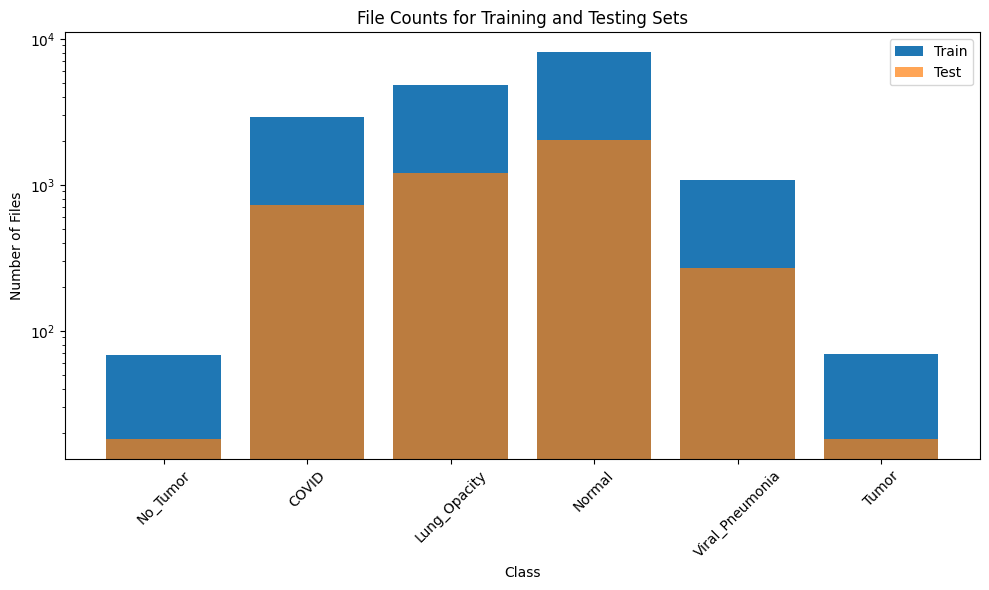

In [10]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf
from PIL import Image
import seaborn as sns

# Define a function to count the number of files for each subdirectory in a given directory.
def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len([file for file in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, file))])

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/kaggle/working/Xray_MRI_Dataset/train'
test_dir = '/kaggle/working/Xray_MRI_Dataset/test'

# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.bar(train_count.columns, train_count.loc['train'], label='Train')

# Plot testing data
plt.bar(test_count.columns, test_count.loc['test'], label='Test', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('File Counts for Training and Testing Sets')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale("log")
plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()

In [67]:
import os
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

train_dir = Path('/kaggle/working/Xray_MRI_Dataset/train')

test_dir =  Path('/kaggle/working/Xray_MRI_Dataset/test')

In [68]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
from pathlib import Path
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(train_dir))])
print(f"Class names found: {class_names_found}")

Target directory: /kaggle/working/Xray_MRI_Dataset/train
Class names found: ['COVID', 'Lung_Opacity', 'No_Tumor', 'Normal', 'Tumor', 'Viral_Pneumonia']


In [69]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [70]:
find_classes(train_dir)

(['COVID', 'Lung_Opacity', 'No_Tumor', 'Normal', 'Tumor', 'Viral_Pneumonia'],
 {'COVID': 0,
  'Lung_Opacity': 1,
  'No_Tumor': 2,
  'Normal': 3,
  'Tumor': 4,
  'Viral_Pneumonia': 5})

# **Tinny VGG (CNN)**

In [71]:

from torch.utils.data import Dataset


class ImageFolderCustom(Dataset):
    

    def __init__(self, targ_dir: str, transform=None) -> None:
        
        
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.png")) 
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
   
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx 
        else:
            return img, class_idx 

In [72]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [73]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e0d040b5540>,
 <__main__.ImageFolderCustom at 0x7e0d040b5f60>)

In [74]:
len(train_data_custom), len(test_data_custom)

(16932, 4235)

In [75]:
train_data_custom.classes ,train_data_custom.class_to_idx

(['COVID', 'Lung_Opacity', 'No_Tumor', 'Normal', 'Tumor', 'Viral_Pneumonia'],
 {'COVID': 0,
  'Lung_Opacity': 1,
  'No_Tumor': 2,
  'Normal': 3,
  'Tumor': 4,
  'Viral_Pneumonia': 5})

In [76]:
class_names = train_data_custom.classes

In [77]:

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
   
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    
    if seed:
        random.seed(seed)

  
    random_samples_idx = random.sample(range(len(dataset)), k=n)

   
    plt.figure(figsize=(16, 8))

   
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

       
        targ_image_adjust = targ_image.permute(1, 2, 0)

      
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

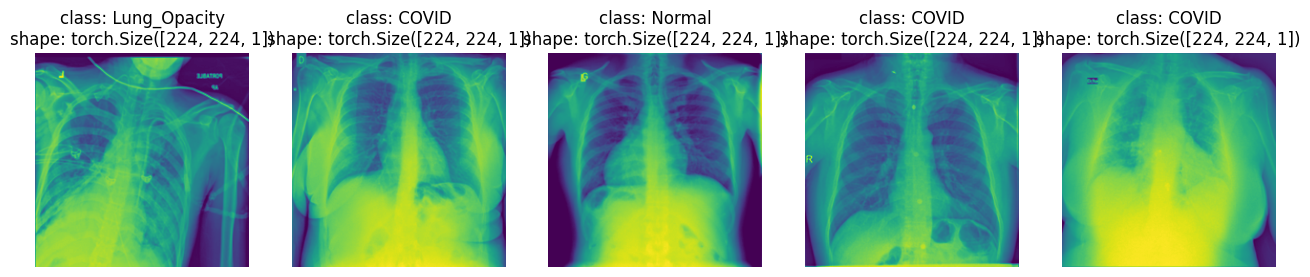

In [78]:
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None)

In [79]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, 
                                     batch_size=32, 
                                     num_workers=0,
                                     shuffle=True) 

test_dataloader_custom = DataLoader(dataset=test_data_custom, 
                                    batch_size=32, 
                                    num_workers=0, 
                                    shuffle=False) 

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e0d040d1c90>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0cd6a57b50>)

In [80]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 1, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [81]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [82]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=train_transform_trivial_augment)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7e0cd6a44d30>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0d040b51e0>)

In [85]:
import torch
from torch import nn
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*56*56,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
#         print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion



In [86]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device):  # Add device parameter
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [87]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device):  # Add device parameter
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [88]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = device,
          patience: int = 5,  # early stopping patience
          min_delta: float = 0.001  # minimum improvement required
          ):
    
    # Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # Initialize early stopping variables
    best_test_loss = float('inf')
    best_epoch = 0
    early_stopping_counter = 0
    
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)  # Pass device to train_step
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)  # Pass device to test_step
        
        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [31]:
import torch
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

def check_image_shapes(data):
    shape_counts = defaultdict(int)
    channel_counts = defaultdict(int)

    if isinstance(data, Dataset):
        for i in range(len(data)):
            img, _ = data[i]
            process_image(img, i, shape_counts, channel_counts)
    elif isinstance(data, DataLoader):
        for i, batch in enumerate(data.dataset):
            img, _ = batch
            process_image(img, i, shape_counts, channel_counts)
    else:
        raise TypeError("Input must be a PyTorch Dataset or DataLoader")

    print_results(shape_counts, channel_counts)
    return shape_counts, channel_counts

def process_image(img, index, shape_counts, channel_counts):
    if not isinstance(img, torch.Tensor):
        raise TypeError(f"Item {index} is not a torch.Tensor")
    
    shape = tuple(img.shape)
    shape_counts[shape] += 1
    channel_counts[shape[0]] += 1

def print_results(shape_counts, channel_counts):
    print("Image shape distribution:")
    for shape, count in shape_counts.items():
        print(f"  Shape {shape}: {count} images")

    print("\nChannel count distribution:")
    for channels, count in channel_counts.items():
        print(f"  {channels} channel(s): {count} images")

    if len(shape_counts) > 1:
        print("\nWARNING: Inconsistent image shapes detected!")
    else:
        print("\nAll images have consistent shape.")

# Usage example:
shape_counts, channel_counts = check_image_shapes(train_dataloader_custom)

Image shape distribution:
  Shape (3, 224, 224): 111 images
  Shape (1, 224, 224): 16821 images

Channel count distribution:
  3 channel(s): 111 images
  1 channel(s): 16821 images



In [89]:
import torch
from torch.utils.data import DataLoader

def custom_collate(batch):
    images = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    
    # Ensure all images have 3 channels
    images = [img.expand(3, -1, -1) if img.size(0) == 1 else img for img in images]
    
    return torch.stack(images), torch.tensor(labels)

# Modified DataLoader with custom_collate function
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=32,
                                     num_workers=0,
                                     shuffle=True,
                                     collate_fn=custom_collate)

# Load a batch
img_custom, label_custom = next(iter(train_dataloader_custom))

# Detailed inspection
print(f"Batch shape: {img_custom.shape}")
print(f"Label shape: {label_custom.shape}")

channel_counts = [img.size(0) for img in img_custom]
# print(f"Channel counts per image: {channel_counts}")

unique_channel_counts = set(channel_counts)
# print(f"Unique channel counts: {unique_channel_counts}")

for i, channels in enumerate(channel_counts):
    if channels != 3:
        print(f"Image {i} has {channels} channels. Shape: {img_custom[i].shape}")

print(f"All images have 3 channels: {all(count == 3 for count in channel_counts)}")
print(f"Unique label values: {torch.unique(label_custom)}")

# Check if any image has NaN values
has_nan = torch.isnan(img_custom).any()
# print(f"Batch contains NaN values: {has_nan}")

# Print min and max values
# print(f"Min value in batch: {img_custom.min()}")
# print(f"Max value in batch: {img_custom.max()}")

Batch shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])
All images have 3 channels: True
Unique label values: tensor([0, 1, 3])


In [90]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_tinyVGG = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data_custom.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_tinyVGG.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_cnn_results = train(model=model_tinyVGG, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device,
                       patience=5)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 0.9969 | train_acc: 0.5827 | test_loss: 0.9333 | test_acc: 0.6139
Epoch: 2 | train_loss: 0.8327 | train_acc: 0.6532 | test_loss: 0.7939 | test_acc: 0.6658
Epoch: 3 | train_loss: 0.7474 | train_acc: 0.6936 | test_loss: 0.7439 | test_acc: 0.7010
Epoch: 4 | train_loss: 0.6985 | train_acc: 0.7210 | test_loss: 0.7047 | test_acc: 0.7148
Epoch: 5 | train_loss: 0.6758 | train_acc: 0.7339 | test_loss: 0.6834 | test_acc: 0.7267
Epoch: 6 | train_loss: 0.6280 | train_acc: 0.7521 | test_loss: 0.6356 | test_acc: 0.7565
Epoch: 7 | train_loss: 0.5789 | train_acc: 0.7705 | test_loss: 0.6227 | test_acc: 0.7526
Epoch: 8 | train_loss: 0.5557 | train_acc: 0.7818 | test_loss: 0.6126 | test_acc: 0.7582
Epoch: 9 | train_loss: 0.5397 | train_acc: 0.7868 | test_loss: 0.5439 | test_acc: 0.7834
Epoch: 10 | train_loss: 0.5154 | train_acc: 0.7964 | test_loss: 0.5508 | test_acc: 0.7865
Epoch: 11 | train_loss: 0.4955 | train_acc: 0.8038 | test_loss: 0.5724 | test_acc: 0.7828
Epoch: 12 | train_l

In [93]:
model_cnn_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [94]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

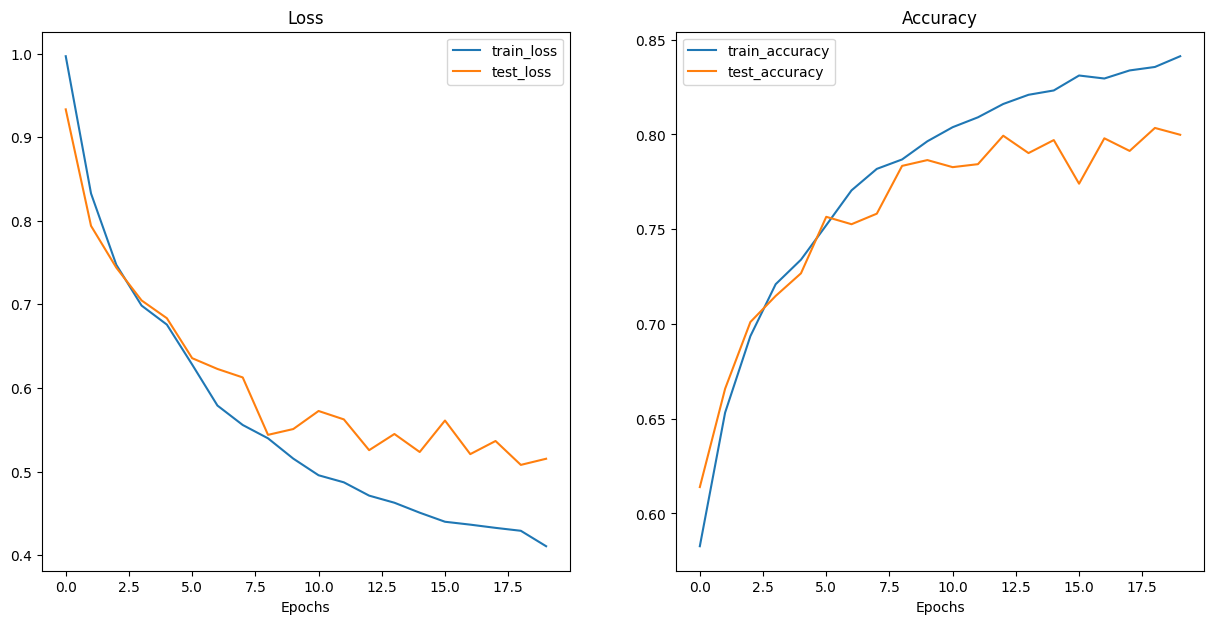

In [95]:
plot_loss_curves(model_cnn_results)

In [31]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, dataloader, class_names):
    """
    Plot a confusion matrix for a PyTorch model.
    
    Args:
    model (torch.nn.Module): The trained PyTorch model
    dataloader (torch.utils.data.DataLoader): DataLoader containing the test data
    class_names (list): List of class names
    
    Returns:
    None (displays the confusion matrix plot)
    """
    # Set the model to evaluation mode
    model.eval()
    
    # Lists to store true labels and predictions
    y_true = []
    y_pred = []
    
    # Iterate over the dataloader
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            # Append true labels and predictions
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


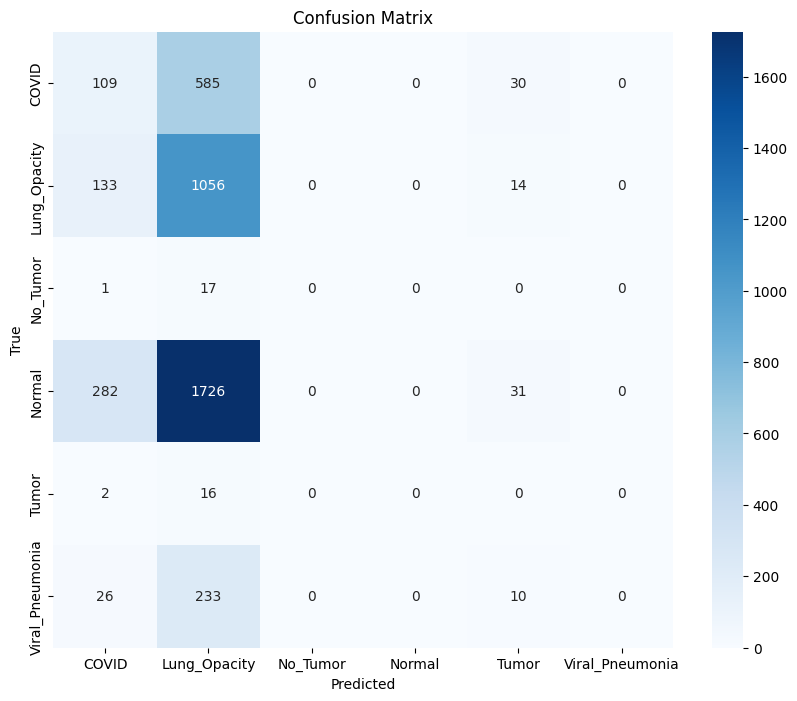

In [96]:
class_names = test_data_simple.classes

# Plot confusion matrix
plot_confusion_matrix(model_tinyVGG, test_dataloader_simple, class_names)

In [131]:
import torch
from torch.nn import functional as F
from sklearn.metrics import precision_recall_fscore_support

def calculate_metrics(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
    
    # Calculate macro average (unweighted mean) of metrics
    macro_precision = precision.mean()
    macro_recall = recall.mean()
    macro_f1 = f1.mean()
    
    return precision, recall, f1, macro_precision, macro_recall, macro_f1

def print_metrics(precision, recall, f1, macro_precision, macro_recall, macro_f1, class_names):
    print("Per-class metrics:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}:")
        print(f"  Precision: {precision[i]:.4f}")
        print(f"  Recall: {recall[i]:.4f}")
        print(f"  F1 Score: {f1[i]:.4f}")
        print()
    
    print("Macro-average metrics:")
    print(f"Precision: {macro_precision:.4f}")
    print(f"Recall: {macro_recall:.4f}")
    print(f"F1 Score: {macro_f1:.4f}")

In [98]:
# Calculate metrics
metrics = calculate_metrics(model_tinyVGG, test_dataloader_manual, device)

# Print metrics
print_metrics(*metrics, class_names)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Per-class metrics:
COVID:
  Precision: 0.1779
  Recall: 0.0622
  F1 Score: 0.0921

Lung_Opacity:
  Precision: 0.2806
  Recall: 0.4655
  F1 Score: 0.3501

No_Tumor:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Normal:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Tumor:
  Precision: 0.0069
  Recall: 0.7778
  F1 Score: 0.0137

Viral_Pneumonia:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Macro-average metrics:
Precision: 0.0776
Recall: 0.2176
F1 Score: 0.0760


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Transfer Learning**

In [99]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [100]:
# 1. Load and transform data
from torchvision import datasets
train_data_manual = datasets.ImageFolder(root=train_dir, transform=manual_transforms)
test_data_manual = datasets.ImageFolder(root=test_dir, transform=manual_transforms)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_manual = DataLoader(train_data_manual, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_manual = DataLoader(test_data_manual, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)


train_dataloader_simple, test_dataloader_simple , class_names

Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7e0cd6a44d30>,
 ['COVID', 'Lung_Opacity', 'No_Tumor', 'Normal', 'Tumor', 'Viral_Pneumonia'])

In [101]:
from torchvision import datasets, io, models, ops, transforms, utils

# Get a set of pretrained model weights
weights = models.EfficientNet_B0_Weights.DEFAULT  # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [102]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [103]:
# 1. Load and transform data
from torchvision import datasets
train_data_manual = datasets.ImageFolder(root=train_dir, transform=auto_transforms)
test_data_manual = datasets.ImageFolder(root=test_dir, transform=auto_transforms)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_manual = DataLoader(train_data_manual, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_manual = DataLoader(test_data_manual, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)


train_dataloader_simple, test_dataloader_simple , class_names

Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7e0cd6a44d30>,
 ['COVID', 'Lung_Opacity', 'No_Tumor', 'Normal', 'Tumor', 'Viral_Pneumonia'])

In [109]:

weights = models.EfficientNet_B0_Weights.DEFAULT 
model_transfer = models.efficientnet_b0(weights=weights).to(device)



In [110]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=model_transfer, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [ ]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_transfer.parameters():
    param.requires_grad = False

for param in model_transfer.features[-3:].parameters():  # Unfreeze the last three layers
    param.requires_grad = True

In [114]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_transfer.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [115]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model_transfer, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 6]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   Partial
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32

In [117]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20
PATIENCE = 5  # Number of epochs with no improvement before early stopping


optimizer = torch.optim.Adam(params=model_transfer.parameters(), lr=0.0001)  # Smaller learning rate
loss_fn = nn.CrossEntropyLoss()

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_transfer_results = train(model=model_transfer, 
                        train_dataloader=train_dataloader_manual,
                        test_dataloader=test_dataloader_manual,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device,
                        patience=PATIENCE)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 0.4211 | train_acc: 0.8605 | test_loss: 0.2127 | test_acc: 0.9235
Epoch: 2 | train_loss: 0.2039 | train_acc: 0.9276 | test_loss: 0.1745 | test_acc: 0.9422
Epoch: 3 | train_loss: 0.1582 | train_acc: 0.9446 | test_loss: 0.1699 | test_acc: 0.9405
Epoch: 4 | train_loss: 0.1236 | train_acc: 0.9561 | test_loss: 0.1736 | test_acc: 0.9433
Epoch: 5 | train_loss: 0.0986 | train_acc: 0.9655 | test_loss: 0.1896 | test_acc: 0.9401
Epoch: 6 | train_loss: 0.0806 | train_acc: 0.9715 | test_loss: 0.1920 | test_acc: 0.9440
Epoch: 7 | train_loss: 0.0604 | train_acc: 0.9788 | test_loss: 0.2099 | test_acc: 0.9461
Epoch: 8 | train_loss: 0.0531 | train_acc: 0.9812 | test_loss: 0.2257 | test_acc: 0.9391
Epoch: 9 | train_loss: 0.0494 | train_acc: 0.9835 | test_loss: 0.2229 | test_acc: 0.9374
Epoch: 10 | train_loss: 0.0379 | train_acc: 0.9868 | test_loss: 0.2304 | test_acc: 0.9494
Epoch: 11 | train_loss: 0.0348 | train_acc: 0.9880 | test_loss: 0.2246 | test_acc: 0.9468
Epoch: 12 | train_l

In [118]:
model_transfer_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

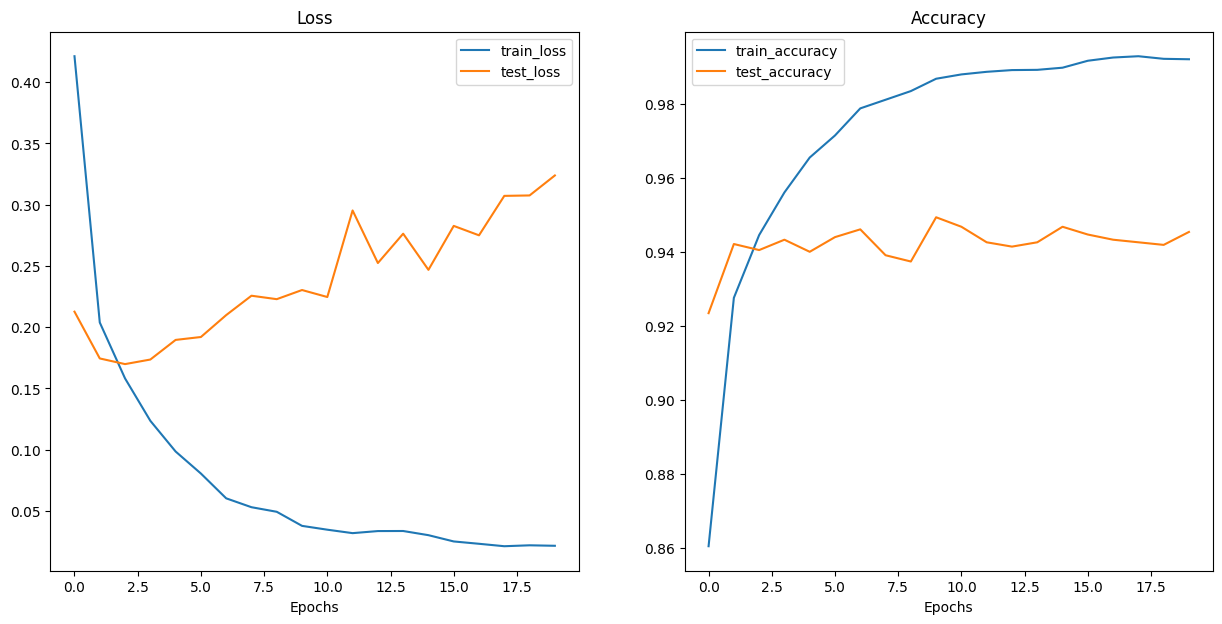

In [119]:
plot_loss_curves(model_transfer_results)

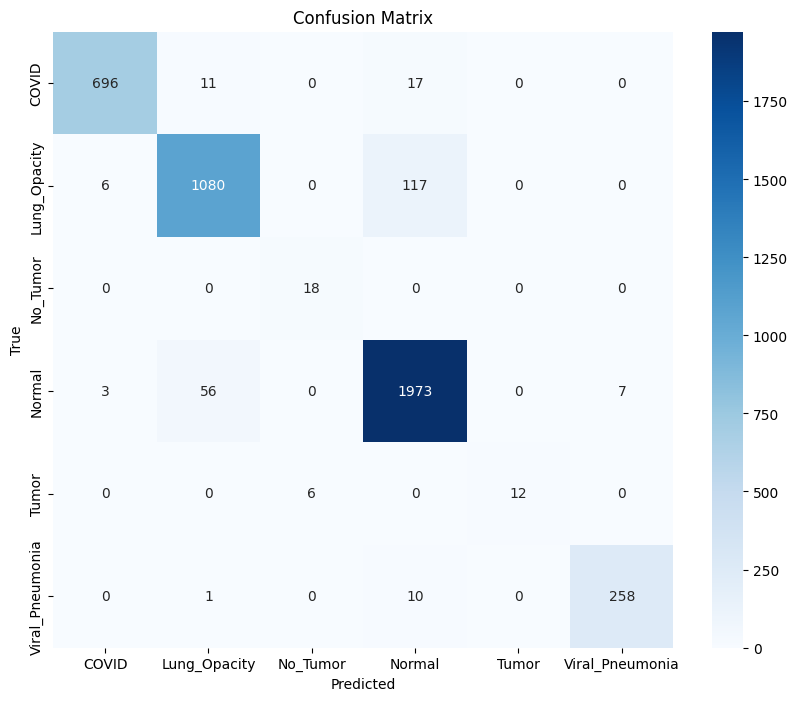

In [120]:
class_names = test_data_manual.classes
plot_confusion_matrix(model_transfer, test_dataloader_manual, class_names)

In [121]:
# Calculate metrics
metrics = calculate_metrics(model_transfer, test_dataloader_manual, device)

# Print metrics
print_metrics(*metrics, class_names)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Per-class metrics:
COVID:
  Precision: 0.9872
  Recall: 0.9613
  F1 Score: 0.9741

Lung_Opacity:
  Precision: 0.9408
  Recall: 0.8978
  F1 Score: 0.9188

No_Tumor:
  Precision: 0.7500
  Recall: 1.0000
  F1 Score: 0.8571

Normal:
  Precision: 0.9320
  Recall: 0.9676
  F1 Score: 0.9495

Tumor:
  Precision: 1.0000
  Recall: 0.6667
  F1 Score: 0.8000

Viral_Pneumonia:
  Precision: 0.9736
  Recall: 0.9591
  F1 Score: 0.9663

Macro-average metrics:
Precision: 0.9306
Recall: 0.9087
F1 Score: 0.9110


# **Class Imbalance Issue**

In [122]:
class_counts = [len([x for x in train_data_manual.targets if x == i]) for i in range(len(class_names))]
total_samples = sum(class_counts)
class_weights = [total_samples / (len(class_names) * count) for count in class_counts]
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Print class weights
for class_name, weight in zip(class_names, class_weights):
    print(f"{class_name}: {weight.item():.4f}")

# Use weighted CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

# Recreate the model and optimizer
model_balanced = models.efficientnet_b0(weights=weights).to(device)

COVID: 0.9836
Lung_Opacity: 0.5915
No_Tumor: 41.8309
Normal: 0.3489
Tumor: 41.2246
Viral_Pneumonia: 2.6436


In [123]:
for param in model_balanced.features.parameters():
    param.requires_grad = False

for param in model_balanced.features[-3:].parameters():  # Unfreeze the last three layers
    param.requires_grad = True

In [125]:
model_balanced.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280, out_features=len(class_names), bias=True)
).to(device)

optimizer = torch.optim.Adam(params=model_balanced.parameters(), lr=0.0001)

In [126]:
NUM_EPOCHS = 20
PATIENCE = 5

model_balanced_results = train(model=model_balanced,
                        train_dataloader=train_dataloader_manual,
                        test_dataloader=test_dataloader_manual,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        patience=PATIENCE)

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 0.5244 | train_acc: 0.8140 | test_loss: 0.2240 | test_acc: 0.9240
Epoch: 2 | train_loss: 0.2464 | train_acc: 0.9084 | test_loss: 0.2262 | test_acc: 0.9240
Epoch: 3 | train_loss: 0.1802 | train_acc: 0.9304 | test_loss: 0.1809 | test_acc: 0.9401
Epoch: 4 | train_loss: 0.1391 | train_acc: 0.9366 | test_loss: 0.1803 | test_acc: 0.9433
Epoch: 5 | train_loss: 0.1112 | train_acc: 0.9444 | test_loss: 0.1861 | test_acc: 0.9405
Epoch: 6 | train_loss: 0.1218 | train_acc: 0.9554 | test_loss: 0.1946 | test_acc: 0.9359
Epoch: 7 | train_loss: 0.0854 | train_acc: 0.9589 | test_loss: 0.2019 | test_acc: 0.9403
Epoch: 8 | train_loss: 0.0716 | train_acc: 0.9661 | test_loss: 0.2064 | test_acc: 0.9366
Epoch: 9 | train_loss: 0.0580 | train_acc: 0.9683 | test_loss: 0.2385 | test_acc: 0.9312
Epoch: 10 | train_loss: 0.0475 | train_acc: 0.9758 | test_loss: 0.2414 | test_acc: 0.9375
Epoch: 11 | train_loss: 0.0432 | train_acc: 0.9778 | test_loss: 0.2320 | test_acc: 0.9387
Epoch: 12 | train_l

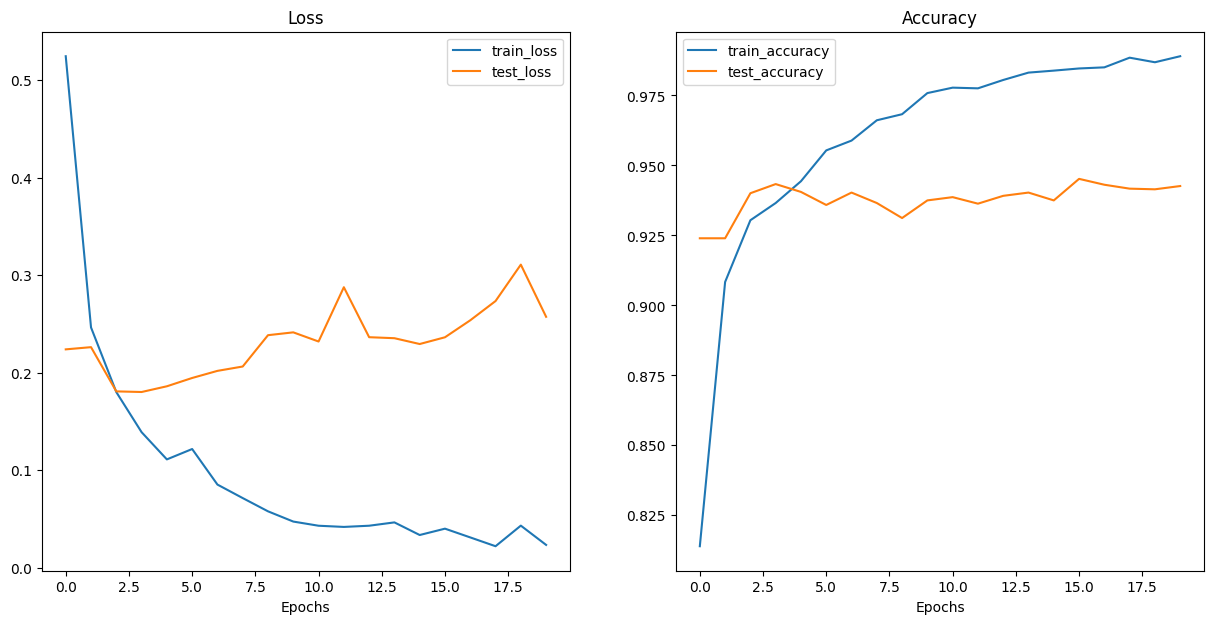

In [127]:
plot_loss_curves(model_balanced_results)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


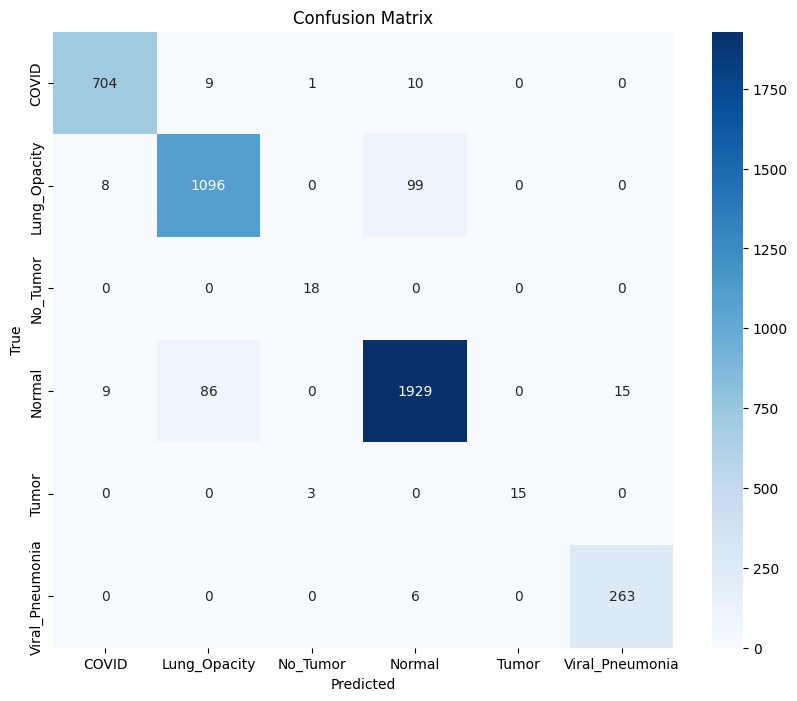

In [132]:
class_names = test_data_manual.classes

# Plot confusion matrix
plot_confusion_matrix(model_balanced, test_dataloader_manual, class_names)

In [135]:
# Calculate metrics
metrics = calculate_metrics(model_balanced, test_dataloader_manual, device)

# Print metrics
print_metrics(*metrics, class_names)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Per-class metrics:
COVID:
  Precision: 0.9764
  Recall: 0.9724
  F1 Score: 0.9744

Lung_Opacity:
  Precision: 0.9202
  Recall: 0.9111
  F1 Score: 0.9156

No_Tumor:
  Precision: 0.8182
  Recall: 1.0000
  F1 Score: 0.9000

Normal:
  Precision: 0.9437
  Recall: 0.9461
  F1 Score: 0.9449

Tumor:
  Precision: 1.0000
  Recall: 0.8333
  F1 Score: 0.9091

Viral_Pneumonia:
  Precision: 0.9460
  Recall: 0.9777
  F1 Score: 0.9616

Macro-average metrics:
Precision: 0.9341
Recall: 0.9401
F1 Score: 0.9343


In [129]:
import torch

# Specify a path to save the model
MODEL_PATH = "/kaggle/working/Cnn_model.pth"
MODEL_PATH_1 = "/kaggle/working/transfer_learning_model.pth"
MODEL_PATH_2 = "/kaggle/working/transfer_balanced_learning_model.pth"

# Save the entire model (architecture + weights)
torch.save(model_tinyVGG.state_dict(), MODEL_PATH)
torch.save(model_transfer.state_dict(), MODEL_PATH_1)
torch.save(model_balanced.state_dict(), MODEL_PATH_2)

In [137]:
import torch
from torchvision import models, transforms
from PIL import Image

def load_model(model_path, num_classes):
    # Load the model architecture
    model = models.efficientnet_b0(weights=None)
    
    # Modify the classifier for your number of classes
    model.classifier = torch.nn.Sequential(
        torch.nn.Dropout(p=0.2, inplace=True),
        torch.nn.Linear(in_features=1280, out_features=num_classes, bias=True)
    )
    
    # Load the trained weights
    model.load_state_dict(torch.load(model_path))
    
    # Set the model to evaluation mode
    model.eval()
    
    return model

def predict(model, image_path, class_names):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

    # Move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)

    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Get the predicted class
    _, predicted_idx = torch.max(output, 1)
    predicted_label = class_names[predicted_idx.item()]

    return predicted_label, probabilities.tolist()

